In [1]:
import numpy as np
import matplotlib.pyplot as plt
import OutputInterface as oi
import sperhical_expansion as se
from scipy.signal import find_peaks
import scipy.special as sp

# Matplotlib asthetics
major = 7.5
minor = 5
width = 1.25
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc("axes", labelsize=16) # 18
plt.rc("xtick", labelsize=14, top=True, direction="in")
plt.rc("ytick", labelsize=14, right=True, direction="in")
plt.rc("axes", titlesize=18)
plt.rc("legend", fontsize=14)
plt.rcParams['font.family'] = "serif"
plt.rcParams['axes.linewidth'] = width
plt.rcParams['xtick.minor.width'] = width
plt.rcParams['xtick.major.width'] = width
plt.rcParams['ytick.minor.width'] = width
plt.rcParams['ytick.major.width'] = width
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

## Get the orbitals from the GAMESS output file

In [2]:
filename = 'output_files/CHBrClF1.out'
output = oi.OutputInterface(filename)
coeffs = output.output_GTOs(output.HOMO)

## Laplace expansion of the wave function:
The Laplace expansion is
$$\psi_0(\mathbf{r})=\sum_{\ell=0}^{\ell_\text{max}}\sum_{m=-\ell}^{\ell}f_{\ell m}(r)Y_\ell^m(\vartheta,\varphi), \qquad f_{\ell m} = \langle Y_\ell^m | \psi_0\rangle$$
 What we need to find are the $c_{\ell m}$-coefficients for the asmptotic Coulomb wave function
 $$\psi_\text{as}(\mathbf{r})=r^{^\frac{1}{\kappa}-1}\text{e}^{-\kappa r} \sum_{\ell=0}^{\ell_\text{max}}\sum_{m=-\ell}^{\ell}c_{\ell m}Y_\ell^m(\vartheta,\varphi)$$

In [4]:
Ip = -output.saved_orbitals[output.HOMO][0]
kappa = np.sqrt(2*Ip)

n_r = 10
r_lst = np.linspace(1, 17, n_r)
flms = []
for i, r in enumerate(r_lst):
    print(f'Evaluating at r={r:.4f} \t Nr. {i+1}/{n_r}')
    flms.append(se.spherical_expansion(lambda theta, phi: output.eval_orbital_spherical(r, theta, phi), 30))

Evaluating at r=1.0000 	 Nr. 1/10
Evaluating at r=2.7778 	 Nr. 2/10
Evaluating at r=4.5556 	 Nr. 3/10
Evaluating at r=6.3333 	 Nr. 4/10
Evaluating at r=8.1111 	 Nr. 5/10
Evaluating at r=9.8889 	 Nr. 6/10
Evaluating at r=11.6667 	 Nr. 7/10
Evaluating at r=13.4444 	 Nr. 8/10
Evaluating at r=15.2222 	 Nr. 9/10
Evaluating at r=17.0000 	 Nr. 10/10


Lets plot it!

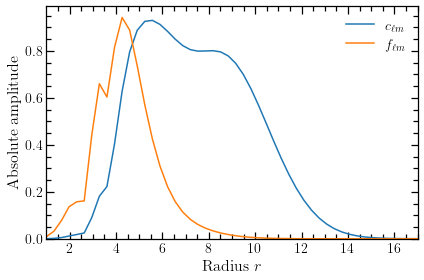

In [34]:
plt.figure(facecolor='white')

def radial(r, kappa):
    return r**(1/kappa - 1) * np.exp(-kappa*r)

sgn, l, m = 1, 5, 4#1, 9, 1#
#plt.plot(r_lst, np.array([output.eval_orbital_spherical(r, np.pi/2, 0) for r in r_lst])*100, label=r'$\psi_0$')
plt.plot(r_lst, np.abs(np.array(flms)[:, sgn, l, m])/radial(r_lst, kappa), label=r'$c_{\ell m}$')
plt.plot(r_lst, np.abs(np.array(flms)[:, sgn, l, m])*70,  label=r'$f_{\ell m}$')
plt.legend(frameon=False)
plt.xlabel(r'Radius $r$')
plt.ylabel(r'Absolute amplitude')
plt.minorticks_on()
plt.xlim(r_lst[0], r_lst[-1])
plt.ylim(bottom=0)
plt.tight_layout()

## Now we'll find the optimal radius $r^\star_{\ell m}$ for each $\ell$ and $m$
This is done by finding the places where $\frac{\text{d}c_{\ell m}}{\text{d}r}=0$ in the above, there are multiple

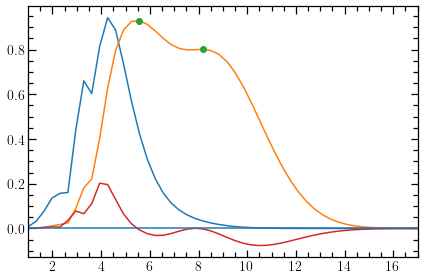

In [38]:
plt.figure(facecolor='white')

clm = np.abs(np.array(flms)[:, sgn, l, m])/radial(r_lst, kappa)
plt.plot(r_lst, np.abs(np.array(flms)[:, sgn, l, m])*70, label=r'$f_{\ell m}$')
clm_deriv = np.gradient(clm)
plt.plot(r_lst, clm)

idx = find_peaks(clm)[0]
plt.plot(r_lst[idx], clm[idx], 'o')
plt.plot(r_lst, clm_deriv)
plt.axhline(0)

plt.minorticks_on()
plt.minorticks_on()
plt.xlim(r_lst[0], r_lst[-1])
plt.tight_layout()

In [90]:
arr = np.array([1]*10)
arr[find_peaks(arr)[0][0]]
if find_peaks(arr)[0].size > 0:
    print('joe')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [14]:
Ip = -output.saved_orbitals[output.HOMO][0]
kappa = np.sqrt(2*Ip)
as_coeff = se.get_as_coeffs(output.eval_orbital_spherical, 8.5, 40, Ip, Z=1)#se.get_asymptotic_coeffs(output.eval_orbital_spherical, 50, 30, Ip, plot=True)

The last point seems like the one to use

In [15]:
from mayavi import mlab
x, y, z = np.mgrid[-10:10:50j, -10:10:50j, -10:10:50j]
surface = se.eval_asymptotic_cart(x, y, z, as_coeff,  Ip)

In [16]:
mlab.contour3d(np.abs(surface), contours=[0.002], transparent=False, color=(1, 0, 0))
mlab.show()

In [13]:
orbital = np.abs(output.eval_orbital(x, y, z))
mlab.contour3d(np.abs(orbital), contours=[0.002], transparent=False, color=(1, 0, 0))
mlab.show()